In [133]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [134]:
data = np.load('mnist.npz')

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

In [135]:
x_train = x_train / 255.0
x_test = x_test / 255.0

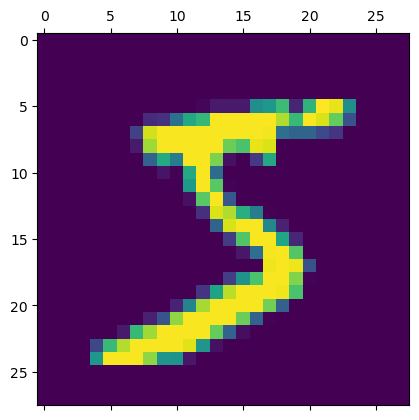

In [136]:
plt.matshow(x_train[0])

In [137]:
model = Sequential([
    Flatten(input_shape=(28, 28)),    # Input layer (28x28 -> 784)
    Dense(128, activation='relu'),    # Hidden layer
    Dense(10, activation='softmax')   # Output layer (10 classes)
])

C:\Users\amana\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [138]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [139]:
model.compile(optimizer='sgd',      
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [140]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8320 - loss: 0.6561 - val_accuracy: 0.9018 - val_loss: 0.3556
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9063 - loss: 0.3332 - val_accuracy: 0.9172 - val_loss: 0.2925
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9192 - loss: 0.2859 - val_accuracy: 0.9272 - val_loss: 0.2598
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9280 - loss: 0.2568 - val_accuracy: 0.9310 - val_loss: 0.2390
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9337 - loss: 0.2355 - val_accuracy: 0.9371 - val_loss: 0.2227


In [141]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)
print("Test loss:", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9371 - loss: 0.2227
Test Accuracy: 0.9370999932289124
Test loss: 0.22267292439937592


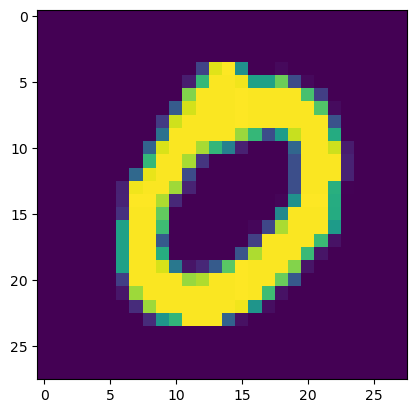

In [142]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [143]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Handwritten number in the image is= 0


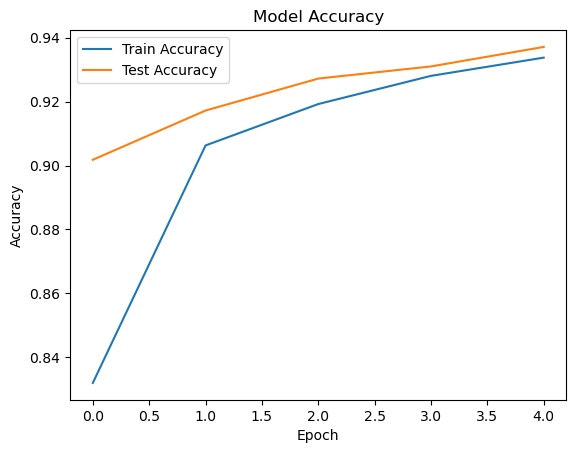

In [144]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

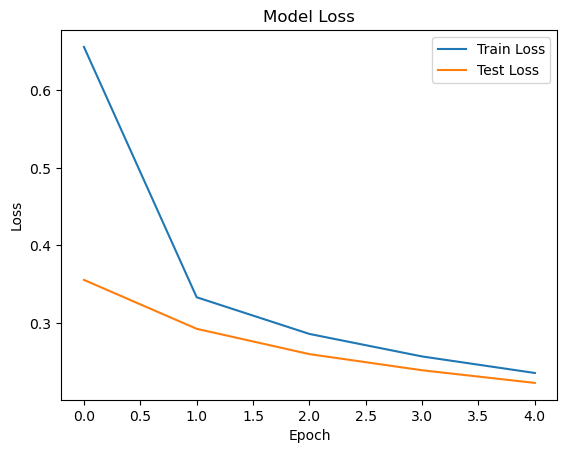

In [145]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()